# StackOverFlow Tag Predictor


<img src='images/pic1.jpg' width="1000" height="540"/>

## Contents

##### [1] Business Problem
##### [2] Source / useful links
##### [3] Exploratory Data Analysis
##### [4] Machine Learning Models
##### [5] Conclusion

In [1]:
import os
import pandas as pd
import numpy as np
#import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from prettytable import PrettyTable
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

<h1> [1] Business Problem </h1>

<p style='font-size:18px'><h2> [1.1] Description </h2></p>
<p>
    Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>

<h2> [1.2] Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> [1.3] Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1> [2] Machine Learning problem </h1>

<h2> [2.1] Data </h2>

<h3> [2.1.1] Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3> [2.1.2] Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2> [2.2] Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> [2.2.1] Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
</p>

<b>Credit</b>: http://scikit-learn.org/stable/modules/multiclass.html

<h3> [2.2.2] Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> [3] Exploratory Data Analysis </h1>

<h2> [3.1] Data Loading and Cleaning </h2>

<h3> [3.1.1] Using Pandas to Load the data</h3>

Note : Pandas is an "in_memory" library. All the processing happens on the RAM. So datsets greater than the amount of RAM cannot be processed. Use graphlab/SQLite instead.

In [2]:
data = pd.read_csv('Train.csv')

<h3> [3.1.2] Counting the number of rows </h3>

In [3]:
print(f"Number of rows in the data : {data.shape[0]}")
print(f"Columns in the data        : {data.columns}")

Number of rows in the data : 6034195
Columns in the data        : Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')


In [4]:
#Change/Fix the data types to prevent type errors
data = data.astype(dtype={'Id':int, 'Title':str, 'Body':str, 'Tags':str})

In [5]:
data.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


<h3> [3.1.3] Checking for duplicates </h3>

In [6]:
#sorting the data and checking for duplicates
sorted_data = data.sort_values(by='Title', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
dup_rows = sorted_data.duplicated(subset=['Title', 'Body', 'Tags'])
num_duplicates = dup_rows[dup_rows == 1].shape[0]
print(f"Number of duplicates : { num_duplicates } ({ num_duplicates * 100 / sorted_data.shape[0] } %)")

Number of duplicates : 1827881 (30.29204392632323 %)


In [7]:
sorted_data[dup_rows == 1].head(10)

,Id,Title,Body,Tags
3954565,3954566,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc
5151142,5151143,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web
1148019,1148020,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web
5831698,5831699,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory
1495183,1495184,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory
5428250,5428251,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql
2755233,2755234,"""Uncaught TypeError: Property 'addListGroup' ...",<p>Asked this the other day but didn't get a r...,javascript listbox
1912243,1912244,"""while( !feof( file ) )"" is always wrong",<p>I've started seeing <code>while( !feof( f )...,c feof
4718675,4718676,"""while( !feof( file ) )"" is always wrong",<p>I've started seeing <code>while( !feof( f )...,c feof
1312543,1312544,$ \sum\limits_{i=1}^{p-1} \Bigl( \Bigl\lfloor...,<p>I was working out some problems. This is gi...,number-theory functions inequality


* 30% of the data is duplicate. We'll remove those duplicate rows. There are instances where the rows are duplicated multiple times(2, 3, ..5).

In [8]:
# dropping the duplicates
no_dup_data = sorted_data[dup_rows != 1]
print(f"Number of rows after removing duplicates : {no_dup_data.shape[0]}")

Number of rows after removing duplicates : 4206314


In [9]:
# storing to disk
if not os.path.isfile("no_dup_data"):
    pd.to_pickle("no_dup_data", "no_duplicates_data")

<h2> [3.2] Analysis of Tags </h2>

<h3> [3.2.1] Total number of unique tags </h3>

In [10]:
no_dup_data['tag_count'] = no_dup_data['Tags'].apply(lambda tag : len(tag.strip().split()))
#no_dup_data['title_len'] = no_dup_data['Title'].apply(lambda title : len(title.strip().split()))

In [11]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
tag_vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = tag_vectorizer.fit_transform(no_dup_data['Tags'])

In [12]:
print(f"Number of data points : {tag_dtm.shape[0]}")
print(f"Number of unique tags : {tag_dtm.shape[1]}")

Number of data points : 4206314
Number of unique tags : 42048


In [13]:
#'get_feature_names()' gives us the vocabulary.
tags = tag_vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> [3.2.3] Number of times a tag appeared </h3>

In [14]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [15]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])

In [16]:
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [17]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values
tag_df_sorted.head(10)

,Tags,Counts
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436
18608,jquery,221533
4346,c++,143935
29101,python,134137
17643,iphone,128681
2215,asp.net,125651


100th percentile : 331505.0
75th percentile  : 66.0
50th percentile  : 17.0
25th percentile  : 5.0
10th percentile  : 2.0


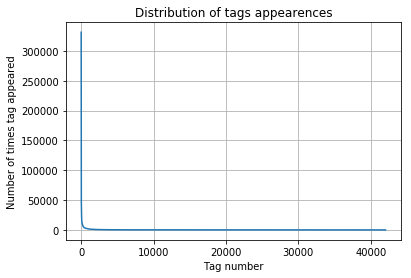

In [18]:
tag_percetiles = np.percentile(a=tag_counts, q=[10, 25, 50, 75, 100])
print(f"100th percentile : {tag_percetiles[-1]}")
print(f"75th percentile  : {tag_percetiles[-2]}")
print(f"50th percentile  : {tag_percetiles[-3]}")
print(f"25th percentile  : {tag_percetiles[-4]}")
print(f"10th percentile  : {tag_percetiles[-5]}")

plt.plot(tag_counts)
plt.title("Distribution of tags appearences")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

* The distribution of tags is highly skewed. Let's zoom in further to 10K tags

100th percentile : 331505.0
75th percentile  : 568.0
50th percentile  : 217.0
25th percentile  : 117.0
10th percentile  : 86.0


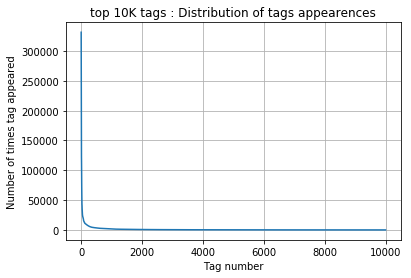

In [19]:
tag_percetiles = np.percentile(a=tag_counts[:10000], q=[10, 25, 50, 75, 100])
print(f"100th percentile : {tag_percetiles[-1]}")
print(f"75th percentile  : {tag_percetiles[-2]}")
print(f"50th percentile  : {tag_percetiles[-3]}")
print(f"25th percentile  : {tag_percetiles[-4]}")
print(f"10th percentile  : {tag_percetiles[-5]}")

plt.plot(tag_counts[:10000])
plt.title("top 10K tags : Distribution of tags appearences")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

* The distribution is still skewed. Lets zoom in further to 1K range.

100th percentile : 331505.0
75th percentile  : 6468.75
50th percentile  : 3457.5
25th percentile  : 2259.75
10th percentile  : 1829.8000000000002


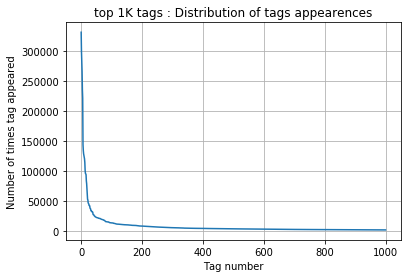

In [20]:
tag_percetiles = np.percentile(a=tag_counts[:1000], q=[10, 25, 50, 75, 100])
print(f"100th percentile : {tag_percetiles[-1]}")
print(f"75th percentile  : {tag_percetiles[-2]}")
print(f"50th percentile  : {tag_percetiles[-3]}")
print(f"25th percentile  : {tag_percetiles[-4]}")
print(f"10th percentile  : {tag_percetiles[-5]}")

plt.plot(tag_counts[:1000])
plt.title("top 1K tags : Distribution of tags appearences")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

100th percentile : 331505.0
75th percentile  : 11162.0
50th percentile  : 6471.5
25th percentile  : 4281.0
10th percentile  : 3756.3


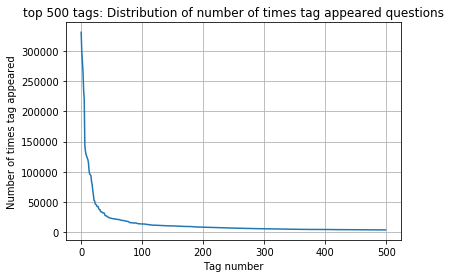

In [21]:
tag_percetiles = np.percentile(a=tag_counts[:500], q=[10, 25, 50, 75, 100])
print(f"100th percentile : {tag_percetiles[-1]}")
print(f"75th percentile  : {tag_percetiles[-2]}")
print(f"50th percentile  : {tag_percetiles[-3]}")
print(f"25th percentile  : {tag_percetiles[-4]}")
print(f"10th percentile  : {tag_percetiles[-5]}")

plt.plot(tag_counts[0:500])
plt.title('top 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

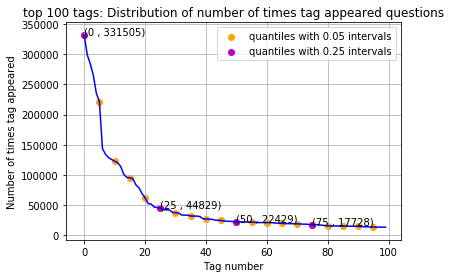

In [22]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('top 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

In [23]:
# Store tags greater than 1K in one list
lst_tags_gt_1k = tag_df[tag_df.Counts > 1000].Tags
#Print the length of the list
print (f'{len(lst_tags_gt_1k)} Tags are used more than 1000 times')
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts > 10000].Tags
#Print the length of the list
print (f'{len(lst_tags_gt_10k)} Tags are used more than 10000 times')
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print (f'{len(lst_tags_gt_100k)} Tags are used more than 100000 times')

1557 Tags are used more than 1000 times
153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. 1557 tags are used more than 1000 times and 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> [3.2.4] Tags Per Question </h3>

In [24]:
print(f"Maximum number of tags per question : {no_dup_data['tag_count'].max()}")
print(f"Minimum number of tags per question : {no_dup_data['tag_count'].min()}")
print(f"Avg. number of tags per question : {no_dup_data['tag_count'].sum() / no_dup_data.shape[0] : .2f}")

Maximum number of tags per question : 5
Minimum number of tags per question : 1
Avg. number of tags per question :  2.90


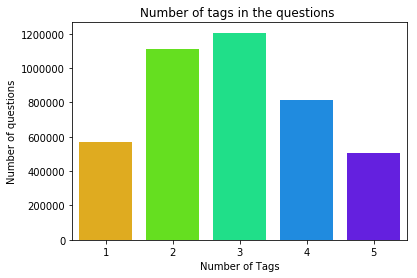

In [25]:
sns.countplot(no_dup_data['tag_count'], palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.9
4. Most of the questions are having 2 or 3 tags

<h3> [3.2.5] Most Frequent Tags </h3>

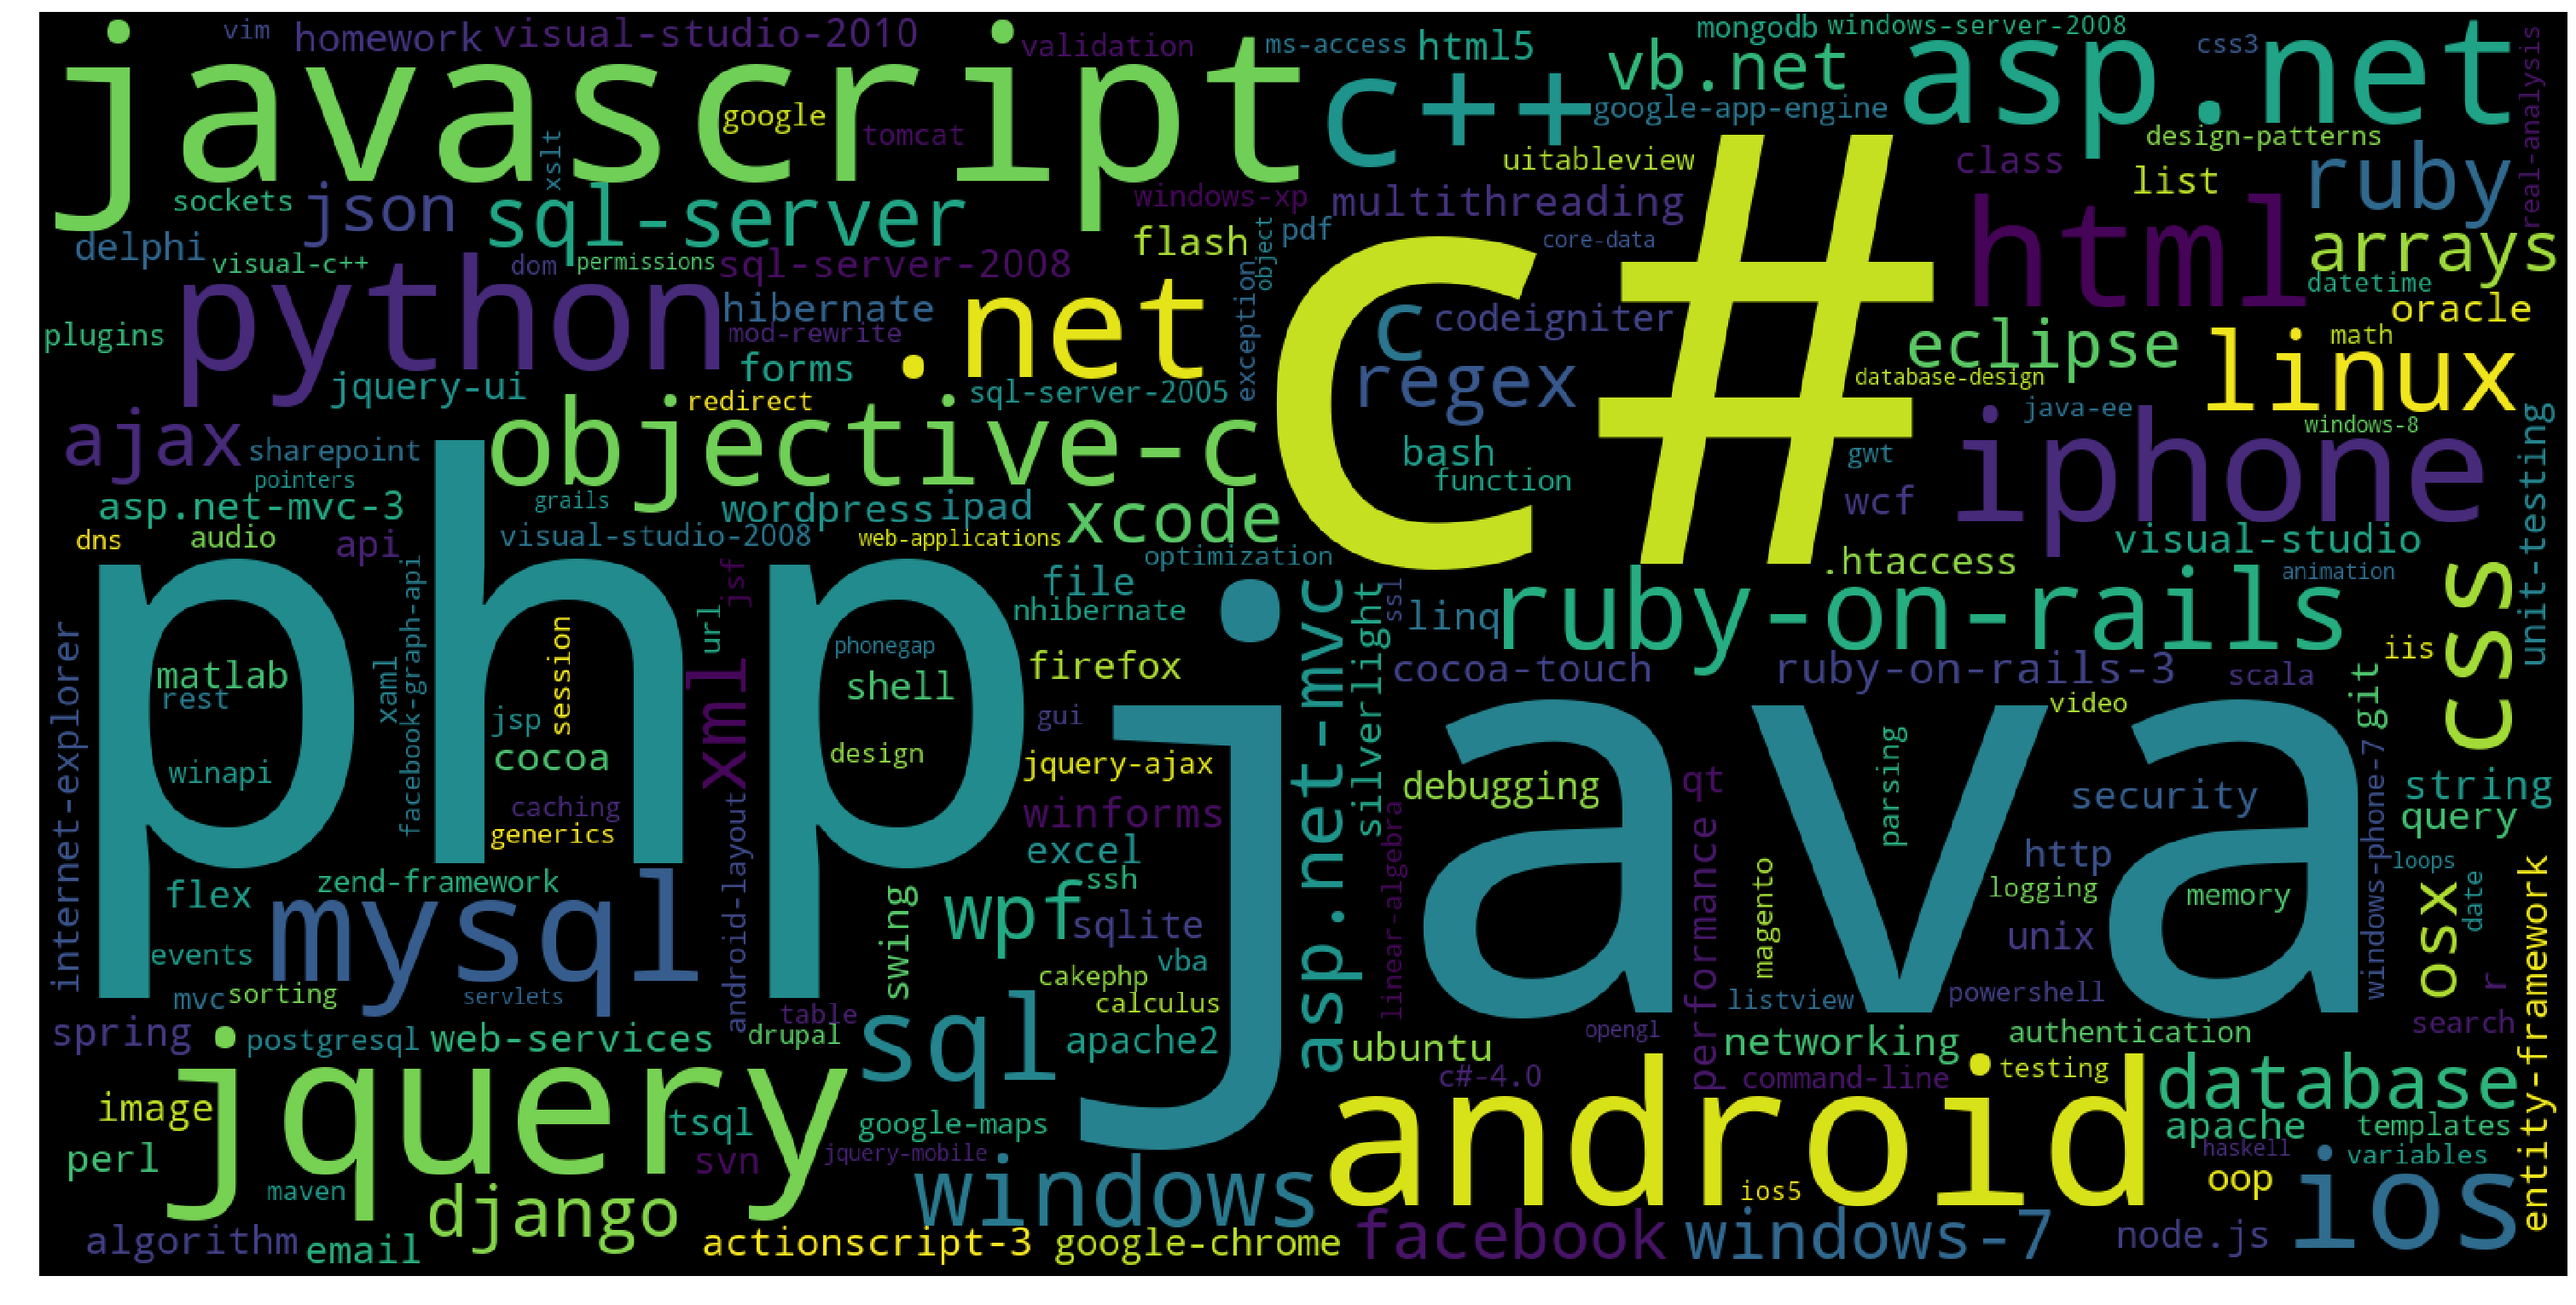

In [26]:
# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',
                      width=1600,
                      height=800
                     ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20), dpi=100)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> [3.2.6] The top 30 tags </h3>

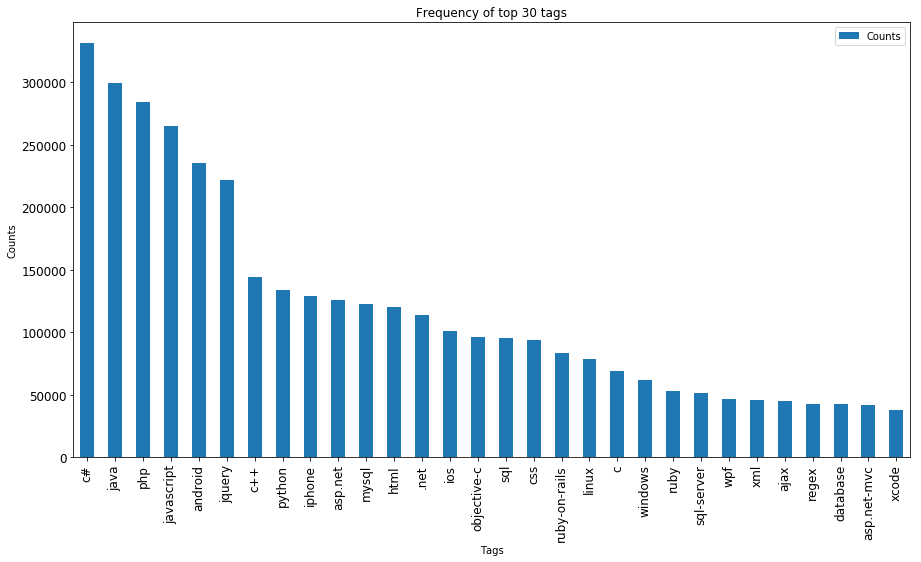

In [43]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar', figsize=(15, 8), fontsize=12)
plt.title('Frequency of top 30 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming languages.
2. C# is the most frequent programming language in the tags.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> [3.3] Cleaning and preprocessing of Questions and Tags </h3>

<h3> [3.3.1] Preprocessing </h3>

<ol> 
    <li> Sample 1Million datapoints </li>
    <li> Separate Code from Body </li>
    <li> Remove Special characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [45]:
#sample 1M rows
final_data = no_dup_data.sample(n=1000000)

In [51]:
final_data.head()

,Id,Title,Body,Tags,tag_count
1781942,1781943,Maven multi-module project with license plugin,"<p>I have a multi-module <a href=""https://gith...",maven pom.xml multi-module project-structure,4
2826420,2826421,jQuery selector,<p>Trying to select anchor tags that are a des...,jquery selectors,2
3605844,3605845,Microsoft Access 2003 Query - Count records an...,<p>I'm creating a query with Microsoft Access ...,ms-access ms-access-2003,2
3800878,3800879,Gtk treeview to fit contents,<p>I have such GUI situation:</p>\n\n<p>Window...,gtk,1
5104926,5104927,Passing lots of variables between threads for ...,<p>I am using VS 2005</p>\n\n<p>I have about 1...,c# performance memory dynamic allocation,5


In [55]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [109]:
start = datetime.now()

questions_with_code = 0
len_pre = 0
len_post = 0
questions_proccesed = 0
processed_dict = {'question' : [], 
                  'tags' : [], 
                  'code' : [],
                  'words_pre' : [],
                  'words_post' : [],
                  'is_code' : []
                 }


for index, row in final_data.iterrows():

    is_code = False
    title, question, tags = row['Title'], row['Body'], row['Tags']

    if '<code>' in question:
        questions_with_code += 1
        is_code = True
    x = len(question)+len(title)
    len_pre += x
    
    #strip out code from body
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    #replace question with whitespace
    question = re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    
    #strip html tags
    question = striphtml(question.encode('utf-8'))

    title = title.encode('utf-8')

    question = str(title) + "  "+ str(title) + " " + str(title)+ " " +str(question)
    question = re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words = word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post += len(question)
    
    processed_dict['question'].append(question)
    processed_dict['code'].append(code)
    processed_dict['tags'].append(tags)
    processed_dict['words_pre'].append(x)
    processed_dict['words_post'].append(len(question))
    processed_dict['is_code'].append(is_code)
    
    questions_proccesed += 1
    
    if (questions_proccesed % 100000 == 0):
        print(f"Number of questions processed : {questions_proccesed}")
        

avg_len_pre = (len_pre * 1.0) / questions_proccesed
avg_len_post = (len_post * 1.0) / questions_proccesed

print(f"Avg length of questions(Title+Body) before processing : {avg_len_pre}")
print(f"Avg length of questions(Title+Body) after processing : {avg_len_post}")
print(f"Percent of questions containing code : {( questions_with_code*100.0) / questions_proccesed}")

print("Time taken to run this cell :", datetime.now() - start)

Number of questions processed : 100000
Number of questions processed : 200000
Number of questions processed : 300000
Number of questions processed : 400000
Number of questions processed : 500000
Number of questions processed : 600000
Number of questions processed : 700000
Number of questions processed : 800000
Number of questions processed : 900000
Number of questions processed : 1000000
Avg length of questions(Title+Body) before processing : 1169.954572
Avg length of questions(Title+Body) after processing : 408.679211
Percent of questions containing code : 57.7537
Time taken to run this cell : 0:33:42.011535


In [ ]:
preprocessed_data = pd.DataFrame.from_dict(processed_dict)
pd.to_pickle(preprocessed_data, 'preprocessed_data1M')

In [2]:
preprocessed_data = pd.read_pickle("preprocessed_data1M").sample(500000)
print(f"Nuber of datapoints sampled from preprocessed data : {preprocessed_data.shape[0]}")

Nuber of datapoints sampled from preprocessed data : 500000


In [3]:
preprocessed_data.head(5)

,question,tags,code,words_pre,words_post,is_code
138772,reportview 11 2012 visual studio 2010 reportvi...,visual-studio-2010 reporting-services sql-serv...,"['&lt;%@ Register Assembly=""Microsoft.ReportVi...",2100,496,True
543327,prevent navig properti insert prevent navig pr...,c# .net entity-framework,['var changedEntities = ChangeTracker.Entries(...,889,458,True
293720,posit uilabel circl posit uilabel circl posit ...,iphone ios uilabel drawrect,['- (id)initWithFrame:(CGRect)frame radius:(CG...,1552,220,True
583068,xcode4 io copi target chang identifi xcode4 io...,ios4 xcode4,[],315,245,False
883243,io nullpoint except io nullpoint except io nul...,ios animation crash,['- (void) hide_waiting_activity\n{\n [UIVi...,6116,1655,True


<h1> [4] Machine Learning Models </h1>

<h2> [4.1] Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [4]:
# binary='true' will give a binary vectorizer
label_vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true')
multilabel_y = label_vectorizer.fit_transform(preprocessed_data['tags'].values)

In [5]:
print(f"Number of Unique Tags : {multilabel_y.get_shape()[1]}")

Number of Unique Tags : 30699


In [6]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0] #summing over the columns to count the frequencies of tags
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)  #sorting the tags
    multilabel_yn = multilabel_y[:,sorted_tags_i[:n]]  #choose the top n tags
    top_tags = np.array(label_vectorizer.get_feature_names())[sorted_tags_i[:n]]
    return multilabel_yn, top_tags

def questions_explained_fn(n):
    multilabel_yn, _ = tags_to_choose(n)
    x = multilabel_yn.sum(axis=1) #summing over the rows with chosen tags
    return (np.count_nonzero(x == 0)) # if the row value of x is 0, then the question can't be explained by the chosen tags.


In [7]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i)) / total_qs) * 100, 3))

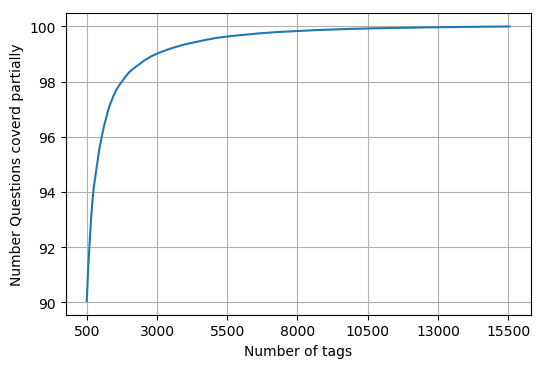

with 5500 tags we are covering 99.011% of questions
with 500 tags we are covering 90.054% of questions


In [8]:
fig, ax = plt.subplots()
fig.dpi = 100
ax.plot(questions_explained)
xlabel = list(500 + np.array(range(-50, 450, 50)) * 50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print(f"with {5500} tags we are covering {questions_explained[50]}% of questions")
print(f"with {500} tags we are covering {questions_explained[0]}% of questions")

In [9]:
# we will consider 500 tags
multilabel_y500, top_500_tags = tags_to_choose(500)
print(f"Number of questions that are not covered : {questions_explained_fn(500)} out of {total_qs} ({questions_explained_fn(500)*100 / total_qs})")

Number of questions that are not covered : 49730 out of 500000 (9.946)


<h2> [4.2] Split the data into train, test and cv (60:20:20) </h2>

In [10]:
Xtrain, X_, Ytrain, Y_ = train_test_split(preprocessed_data, multilabel_y500, test_size=0.4, shuffle=True)
Xcv, Xtest, Ycv, Ytest = train_test_split(X_, Y_, test_size=0.5, shuffle=True)

In [11]:
print(f'Size of Xtrain : {Xtrain.shape[0]}')
print(f'Size of Xcv    : {Xcv.shape[0]}')
print(f'Size of Xtest  : {Xtest.shape[0]}')

Size of Xtrain : 300000
Size of Xcv    : 100000
Size of Xtest  : 100000


<h2> [4.3] Featurizing data with BOW </h2>

In [12]:
start = datetime.now()

bow_vectorizer = CountVectorizer(min_df=0.00009, 
                                 max_features=200000,
                                 tokenizer = lambda x: x.split(), 
                                 ngram_range=(1, 4))

X_train_bow = bow_vectorizer.fit_transform(Xtrain['question'].values)
X_cv_bow = bow_vectorizer.transform(Xcv['question'].values)
X_test_bow = bow_vectorizer.transform(Xtest['question'].values)

print(f"Time taken to run this cell : {datetime.now() - start}")

Time taken to run this cell : 0:05:53.895815


In [28]:
def find_optimal_c(Xtr, Ytr, Xcv, Ycv, loss='log', c_values=None):

    f1_scores = []
    recall_scores = []
    precision_scores = []
    c_values = np.round(c_values, 7)
    
    for c in c_values:
        clf = OneVsRestClassifier(SGDClassifier(loss=loss, alpha=c), n_jobs=6)
        clf.fit(Xtr, Ytr)
        preds = clf.predict(Xcv)
        f1_ = np.round(f1_score(Ycv, preds, average='micro'), 3)
        re_ = np.round(recall_score(Ycv, preds, average='micro'), 3)
        pr_ = np.round(precision_score(Ycv, preds, average='micro'), 3)
        f1_scores.append(f1_)
        recall_scores.append(re_)
        precision_scores.append(pr_)
        print(f" c = {c}, micro_f1_score = {f1_ : .3f}, precision = {pr_ : .3f}, recall = {re_ : .3f}")
        
    plt.figure(dpi=100)
    plt.plot(c_values, f1_scores, color='black', label='micro_f1')
    plt.plot(c_values, recall_scores, color='red', label='recall')
    plt.plot(c_values, precision_scores, color='green', label='precision')
    plt.xscale('log')
    plt.xticks
    plt.title(f"Regularization")
    #for xy in zip(search_values, MCE):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('C (1/lambda)')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid()
    #plt.rcParams.update({'font.size':14})
    plt.tight_layout()


<h2> [4.4] Applying Logistic Regression with OneVsRest Classifier </h2>

 c = 1e-06, micro_f1_score =  0.451, precision =  0.470, recall =  0.433
 c = 5e-06, micro_f1_score =  0.465, precision =  0.510, recall =  0.427
 c = 2.51e-05, micro_f1_score =  0.487, precision =  0.589, recall =  0.416
 c = 0.0001259, micro_f1_score =  0.498, precision =  0.687, recall =  0.390
 c = 0.000631, micro_f1_score =  0.469, precision =  0.705, recall =  0.351
 c = 0.0031623, micro_f1_score =  0.393, precision =  0.723, recall =  0.270
 c = 0.0158489, micro_f1_score =  0.270, precision =  0.778, recall =  0.164
 c = 0.0794328, micro_f1_score =  0.137, precision =  0.864, recall =  0.074
 c = 0.3981072, micro_f1_score =  0.027, precision =  0.907, recall =  0.014
 c = 1.9952623, micro_f1_score =  0.002, precision =  0.944, recall =  0.001
 c = 10.0, micro_f1_score =  0.000, precision =  0.964, recall =  0.000


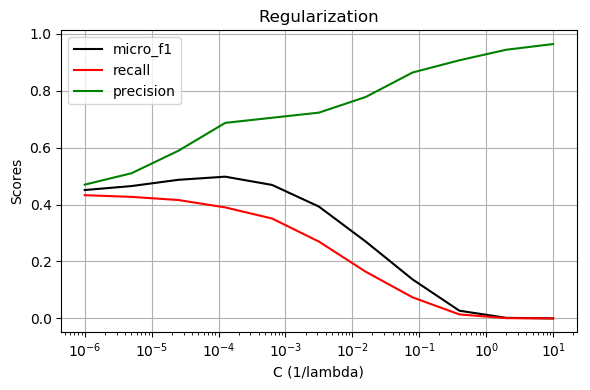

In [21]:
find_optimal_c(Xtrain_bow, Ytrain, Xcv_bow, Ycv, c_values=np.logspace(-6, 1, 11))

In [25]:
log_clf = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.0001259), n_jobs=6)
log_clf.fit(Xtrain_bow, Ytrain)
log_regr_preds = log_clf.predict(Xtest_bow)

In [26]:
print(f" Micro-F1 Score : { f1_score(Ytest, log_regr_preds, average='micro') }")
print(f" Precision      : { precision_score(Ytest, log_regr_preds, average='micro') }")
print(f" Recall         : { recall_score(Ytest, log_regr_preds, average='micro') }")

 Micro-F1 Score : 0.49679897567221515
 Precision      : 0.6829994873828477
 Recall         : 0.3903744202373779


<b> Observations: </b><br>

* The model trained using SGD with log-loss was able to achieve 0.465 on micro-f1 score.
* The precision looks okay but the recall is on the smaller side indicating the model flagged many postives as negatives.
* We'll alse build a Linear SVM to see our whether the performance can be improved.

<h2> [4.5] Applying Linear SVM with OneVsRest Classifier </h2>

 c = 1e-06, micro_f1_score =  0.458, precision =  0.475, recall =  0.442
 c = 5.2e-06, micro_f1_score =  0.466, precision =  0.514, recall =  0.426
 c = 2.68e-05, micro_f1_score =  0.481, precision =  0.567, recall =  0.418
 c = 0.0001389, micro_f1_score =  0.507, precision =  0.675, recall =  0.406
 c = 0.0007197, micro_f1_score =  0.495, precision =  0.799, recall =  0.359
 c = 0.0037276, micro_f1_score =  0.439, precision =  0.815, recall =  0.301
 c = 0.019307, micro_f1_score =  0.322, precision =  0.836, recall =  0.199
 c = 0.1, micro_f1_score =  0.185, precision =  0.887, recall =  0.103


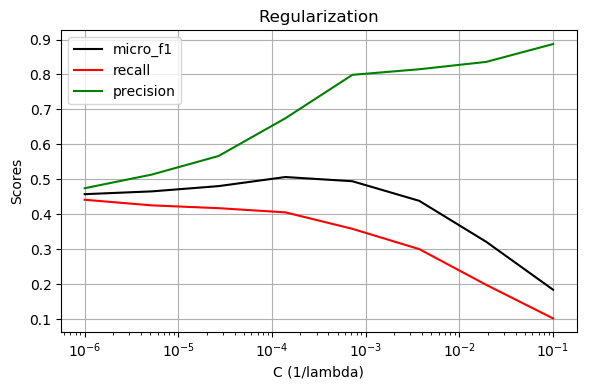

In [29]:
find_optimal_c(Xtrain_bow, Ytrain, Xcv_bow, Ycv, loss='hinge', c_values=np.logspace(-6, -1, 8))

In [31]:
svm_clf = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.0001389), n_jobs=6)
svm_clf.fit(Xtrain_bow, Ytrain)
svm_preds = svm_clf.predict(X_test_bow)

In [33]:
print(f" Micro-F1 Score : { f1_score(Ytest, svm_preds, average='micro') }")
print(f" Precision      : { precision_score(Ytest, svm_preds, average='micro') }")
print(f" Recall         : { recall_score(Ytest, svm_preds, average='micro') }")

 Micro-F1 Score : 0.5080430154935691
 Precision      : 0.67396569214319
 Recall         : 0.4076774667897597


<b> Observations: </b><br>


* The performance metrics of Linear SVM are almost similar to Logistic Regression's with slightly high scores.
* We'll examine the predictions further to choose between the models.

### [4.6] Understanding the results

* We'll pick some questions at random and examine the results.

In [37]:
def print_predictions(idx):

    #print(f" INDEX : {idx}")
    #print()
    print(f" QUESTION : {Xtest.iloc[idx]['question']}")
    print()
    print(f" TAGS : {Xtest.iloc[idx]['tags']}")
    print()
    print(f" TRUE LABELS : {top_500_tags[np.where(Ytest[idx].todense() == 1)[1]]}")
    print()
    print(f" Logistic Regression PREDICTED LABELS : {top_500_tags[np.where(log_regr_preds[idx].todense() == 1)[1]]}")
    print()
    print(f" Linear SVM PREDICTED LABELS : {top_500_tags[np.where(svm_preds[idx].todense() == 1)[1]]}")

In [88]:
rand_indices = np.random.randint(0, 100000, 10)

In [89]:
print_predictions(rand_indices[0]) 
#Both failed

 QUESTION : machine.migr matur enough use machine.migr matur enough use machine.migr matur enough use ok thank 1st guy found code machine.migr mean data schema data migrat framework mean one mention http blog.eleutian.com 2008 04 25 afirstlookatmachinemigrations.aspx ok somebodi use think would like framework project use rail framework help lot make migrat systemat

 TAGS : .net database

 TRUE LABELS : ['.net' 'database']

 Logistic Regression PREDICTED LABELS : []

 Linear SVM PREDICTED LABELS : []


In [90]:
print_predictions(rand_indices[1]) 
# Linear SVM predicted the true label

 QUESTION : add simpl high score function simpl io game add simpl high score function simpl io game add simpl high score function simpl io game creat simpl yet fun game help tutori want add high score function game post sourc code sure tri anyway basic want add highscor upper right corner screen abil game store highest score player name sure even possibl someon expier could help realli appreci

 TAGS : ios scoring

 TRUE LABELS : ['ios']

 Logistic Regression PREDICTED LABELS : []

 Linear SVM PREDICTED LABELS : ['ios']


In [91]:
print_predictions(rand_indices[2])  
#lr SVM failed in predicting the label

 QUESTION : rewrit subdomain rewrit subdomain rewrit subdomain tri generat subdomain rewrit rule nit look like http www.example.com.dev folder default.html nto http folder.example.com.dev default.html far got pretti new help nthank comment

 TAGS : .htaccess mod-rewrite rewrite

 TRUE LABELS : ['.htaccess' 'mod-rewrite']

 Logistic Regression PREDICTED LABELS : ['mod-rewrite']

 Linear SVM PREDICTED LABELS : []


In [93]:
print_predictions(rand_indices[3]) 
#Both the models predicted the same tags

 QUESTION : modifi copi past item outlook prior save c modifi copi past item outlook prior save c modifi copi past item outlook prior save c recent wrote outlook plug-in use outlook 2010 client sync user outlook databas third-parti applic work fine howev one thing client want leverag standard copi past function duplic record outlook issu defin userproperti outlook record sent third-parti system store intern id third-parti system client perform copi past userproperti also copi bad creat multipl record third-parti id wonder way detect via code copi past occur make modif record remov userproperti prior save might perform task appoint contact would need guidanc would appli across board per suggest attempt leverag beforeitempast seen messag appear first time copi past never tri leverag application.explor theoret give access explor outlook give access individu one appoint task contact look one element array debug also tri access specif explor item invok mapifolder.getexplor alway return null

In [94]:
print_predictions(rand_indices[4])
#Both failed

 QUESTION : comprehens list clojure.cor macro take bind vector comprehens list clojure.cor macro take bind vector comprehens list clojure.cor macro take bind vector look get list clojure.cor symbol take destructur form top head list ... look comprehens list one

 TAGS : clojure

 TRUE LABELS : ['clojure']

 Logistic Regression PREDICTED LABELS : []

 Linear SVM PREDICTED LABELS : []


In [95]:
print_predictions(rand_indices[5])

 QUESTION : uitableview ext bad access scroll uitableview ext bad access scroll uitableview ext bad access scroll follow code .h file .m file scroll tableview simul ext bad access happen solv problem

 TAGS : xcode parsing uitableview

 TRUE LABELS : ['xcode' 'parsing' 'uitableview']

 Logistic Regression PREDICTED LABELS : ['iphone' 'uitableview']

 Linear SVM PREDICTED LABELS : ['iphone' 'uitableview']


In [96]:
print_predictions(rand_indices[6])
#Linear SVM missed the important label 'asp.net-mvc'

 QUESTION : prevent inherit valid attribut model prevent inherit valid attribut model prevent inherit valid attribut model use base contact model custom contact model class inherit base contact model use valid attribut flag properti requir case want overrid stop go possibl attempt use new valid attribut notrequir return true appear attribut stack requir amp notrequir run valid fail look solut find found unrel attribut inherit properti see nativ valid attribut system.componentmodel.dataannot lost caus need roll version would support disabl inherit help great appreci

 TAGS : asp.net-mvc inheritance validationattribute

 TRUE LABELS : ['asp.net-mvc' 'inheritance']

 Logistic Regression PREDICTED LABELS : ['asp.net-mvc-3']

 Linear SVM PREDICTED LABELS : ['validation' 'inheritance']


In [98]:
print_predictions(rand_indices[7])
#Both the models predicted the tags without being explictly labelled. But the body of the question seems to be about 'exception-handling'

 QUESTION : jni except return nativ code incompatibleclasschangeerror invok method interfac implement class jni except return nativ code incompatibleclasschangeerror invok method interfac implement class jni except return nativ code incompatibleclasschangeerror invok method interfac implement class weird one java c code seem work fine howev everyth done c code program would continu rest java implement except thrown forc simpli wrap call nativ code tri catch worri except thrown reason unknown anyon seen weird thought

 TAGS : jni android-ndk

 TRUE LABELS : []

 Logistic Regression PREDICTED LABELS : ['java' 'exception']

 Linear SVM PREDICTED LABELS : ['c#' 'java' 'exception-handling']


In [99]:
print_predictions(rand_indices[8])
#Both the models predicted the tags without being explictly labelled. But the body of the question seems to be about 'exception-handling'

 QUESTION : mimic imrn mimic imrn mimic imrn tri typeset articl look like one imrn see exampl http imrn.oxfordjournals.org content earli 2011 12 04 imrn.rnr232.short rss tri use recommend tex class file instruct imrn websit nuse class kind look similar exampl font differ anybodi know typeset articl latex look imrn

 TAGS : fonts templates

 TRUE LABELS : ['templates' 'fonts']

 Logistic Regression PREDICTED LABELS : []

 Linear SVM PREDICTED LABELS : []


In [100]:
print_predictions(rand_indices[9])

 QUESTION : use yahoo.util.connect.asyncrequest return result use yahoo.util.connect.asyncrequest return result use yahoo.util.connect.asyncrequest return result use yahoo.util.connect.asyncrequest get data databas code would like function return contentcurvalu eg 15 tri use code get undefin error probabl due asynchron queri forc var test getcountarticl wait result

 TAGS : javascript yui yui-datatable

 TRUE LABELS : ['javascript']

 Logistic Regression PREDICTED LABELS : []

 Linear SVM PREDICTED LABELS : []


<b> Observations: </b>

* Predictions of both the models turned out to be almost the same.
* Linear SVM appears to use the body of the question better in predicting the labels.

## [5.5] Conclusion

In [101]:
def conclusion(model_names, true_labels, preds):
    
    x = PrettyTable()
    x.field_names = ['Model', 'C', 'Precision', 'Recall', 'Micro-F1 Score']
    
    p1 = precision_score(true_labels, preds[0], average='micro')
    r1 = recall_score(true_labels, preds[0], average='micro')
    m1 = f1_score(true_labels, preds[0], average='micro')
    
    p2 = precision_score(true_labels, preds[1], average='micro')
    r2 = recall_score(true_labels, preds[1], average='micro')
    m2 = f1_score(true_labels, preds[1], average='micro')
    
    x.add_row([model_names[0], 0.0001259, p1, r1, m1])
    x.add_row([model_names[1], 0.0001389, p2, r2, m2])
    
    print(x)

In [102]:
conclusion(model_names=['LogisticRegression', 'Linear SVM'], true_labels=Ytest, preds=[log_regr_preds, svm_preds])

+--------------------+-----------+--------------------+--------------------+---------------------+
|       Model        |     C     |     Precision      |       Recall       |    Micro-F1 Score   |
+--------------------+-----------+--------------------+--------------------+---------------------+
| LogisticRegression | 0.0001259 | 0.6829994873828477 | 0.3903744202373779 | 0.49679897567221515 |
|     Linear SVM     | 0.0001389 |  0.67396569214319  | 0.4076774667897597 |  0.5080430154935691 |
+--------------------+-----------+--------------------+--------------------+---------------------+


* We choose SGD to train the models since  it's an effieient method to deal with the large datasets.
* Both the models Logistic Regression and Linear SVM are almost similar in performance.
* Still the performance of both the models is strictly average with mid micro f1 scores.
* We may need more complex models to derive more performance.
* After examining the predictions of both the models, Linear SVM does seem better.